In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import wave
from scipy import signal
import math
import librosa as lr

In [10]:
import soundfile as sf

input = "B:\prg\Z23\\techniki_multimedialne\projekt\Projekt_audio\hrir\diffuse\elev0\H0e045a.wav"
irfr, irsr = sf.read(input)
Audio(irfr.transpose(), rate = irsr)

In [11]:
print(sf.__version__)
print(sf.__libsndfile_version__)

0.12.1
1.2.0


In [12]:
input = "speech.wav"
fr, sr = sf.read(input)
Audio(fr.transpose(), rate = sr)

In [13]:
fr_resampled = lr.resample(fr, target_sr=irsr, orig_sr=sr)
Audio(fr_resampled.transpose(), rate = irsr)

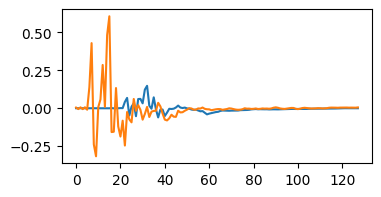

In [14]:
plt.figure(figsize=(4,2))
plt.plot(irfr[:,0])
plt.plot(irfr[:,1])
plt.show()

In [15]:
s_R = np.convolve(fr_resampled,irfr[:,0])
s_L = np.convolve(fr_resampled,irfr[:,1])

In [16]:
mix = np.vstack([s_R, s_L])

In [17]:
Audio(mix, rate=irsr)

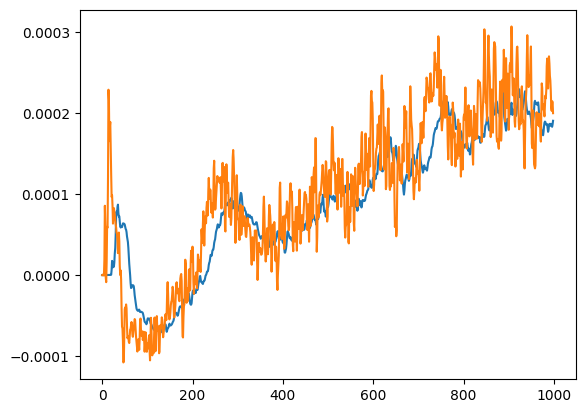

In [38]:
plt.plot(mix[0,1:1000])
plt.plot(mix[1,1:1000])

In [18]:
mix.shape

(2, 378329)

In [19]:
fftfr = np.fft.rfft(mix[0,:])
freq = np.fft.rfftfreq(len(mix[0,:]), d=1./44100)
val = freq[np.where(fftfr==max(fftfr))][0]
for i in range(len(freq)):
    if freq[i] > 105 or freq[i] < 95:
        fftfr[i] = 0

s_R = np.fft.irfft(fftfr)

fftfr = np.fft.rfft(mix[1,:])
freq = np.fft.rfftfreq(len(mix[1,:]), d=1./44100)
val = freq[np.where(fftfr==max(fftfr))][0]
for i in range(len(freq)):
    if freq[i] > 105 or freq[i] < 95:
        fftfr[i] = 0

s_L = np.fft.irfft(fftfr)

mix2 = np.vstack([s_R, s_L])

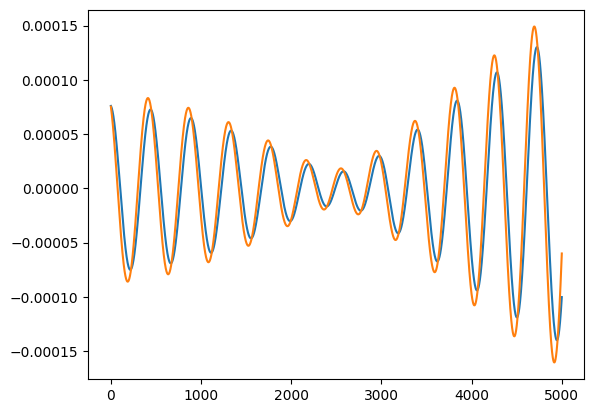

In [20]:
plt.plot(mix2[0,0:5000])
plt.plot(mix2[1,0:5000])

In [21]:
peak1 = np.where(mix2[0,0:5000]>0.00010)[0][0:10]
peak2 = np.where(mix2[1,0:5000]>0.00010)[0][60:70]
print(peak1, peak2)

[4255 4256 4257 4258 4259 4260 4261 4262 4263 4264] [4268 4269 4270 4271 4272 4273 4274 4275 4276 4277]


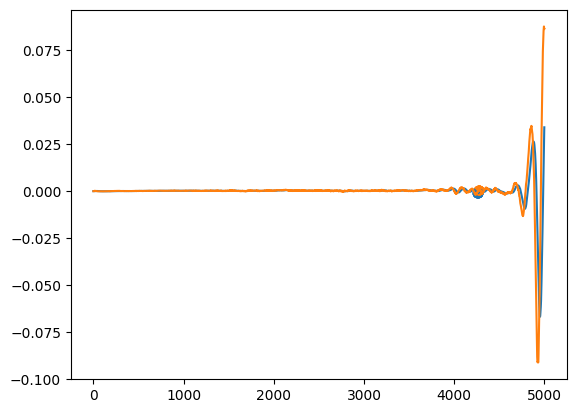

In [22]:
plt.plot(mix[0,0:5000])
plt.plot(mix[1,0:5000])
plt.scatter(peak1, mix[0,peak1])
plt.scatter(peak2, mix[1,peak2])

In [23]:
print(peak1-peak2)

[-13 -13 -13 -13 -13 -13 -13 -13 -13 -13]


In [24]:
abs(peak1-peak2)*1/irsr/10

array([2.9478458e-05, 2.9478458e-05, 2.9478458e-05, 2.9478458e-05,
       2.9478458e-05, 2.9478458e-05, 2.9478458e-05, 2.9478458e-05,
       2.9478458e-05, 2.9478458e-05])

In [25]:
head_width = 0.1
head_r = head_width/2

sound_speed = 345 #predkosc dzwieku

time_dif = abs(peak1-peak2)/irsr
dist_dif = sound_speed*time_dif


In [26]:
print(dist_dif)

[0.10170068 0.10170068 0.10170068 0.10170068 0.10170068 0.10170068
 0.10170068 0.10170068 0.10170068 0.10170068]


In [27]:
aoa = np.arcsin(dist_dif/head_r/10)

In [28]:
dist_dif/head_r

array([2.03401361, 2.03401361, 2.03401361, 2.03401361, 2.03401361,
       2.03401361, 2.03401361, 2.03401361, 2.03401361, 2.03401361])

In [29]:
math.degrees(aoa)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
Audio(mix2, rate=irsr)

In [ ]:
Audio(fr, rate=irsr)